In [1]:
from skimage import color,io,filters,morphology
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np

# Soal 1

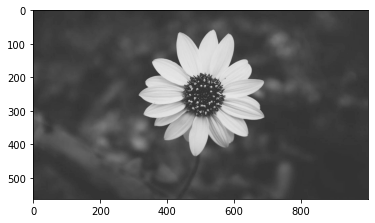

In [2]:
i1 = io.imread('sunflower.jpg')
plt.imshow(i1,cmap='gray')
plt.show()


### a. Tampilkan histogram citra tersebut dengan range intensitas 0 - 255


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


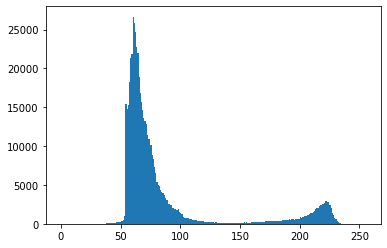

In [3]:
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(i1))
plt.hist(gray.flatten(), 255, range=(0,255))
plt.show()

### b.  Lakukan histogram equalization terhadap citra tersebut kemudian tampilkan histogramnya.


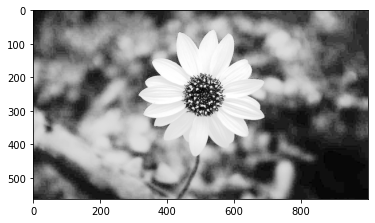

In [4]:
from skimage import exposure
eq_i1 = exposure.equalize_hist(i1)
plt.imshow(eq_i1,cmap='gray')

plt.show()

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


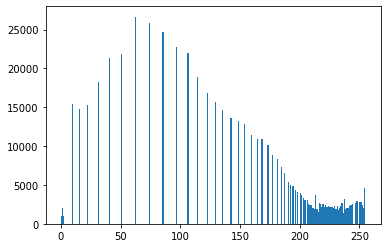

In [5]:
gray = util.img_as_ubyte(color.rgb2gray(eq_i1))
plt.hist(gray.flatten(), 255, range=(0,255))
plt.show()

### c. Lakukan contrast stretching terhadap citra asli kemudian tampilkan histogramnya.

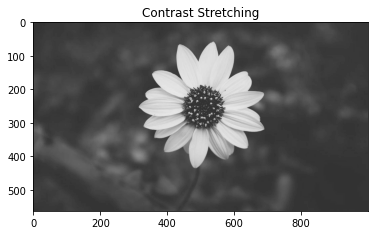

In [6]:
mn = min(i1.flatten())
mx = max(i1.flatten())
b = int(np.floor(255 / (mx - mn)))
i1_cs = (i1 - mn) * b

plt.imshow(i1_cs,cmap='gray')
plt.title('Contrast Stretching')
plt.show()

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


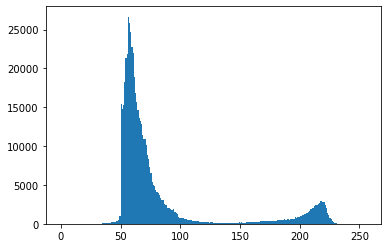

In [7]:
gray = util.img_as_ubyte(color.rgb2gray(i1_cs))
plt.hist(gray.flatten(), 255, range=(0,255))
plt.show()

### d. Coba ceritakan perbedaan apa yang dapat anda temukan antara metode histogram equalization dan contrast stretching.

Dari gambar terlihat bahwa histogram equalization lebih membuat gambar menjadi jelas sehingga kita bisa melihat cukup dengan jelas area sekitar bunga yang dihaislkan oleh histogram equalization. Sedangkan contrast stretching
tampak lebih mirip dengan citra grayscale asli dibandingkan dengan citra hasil histogram equalization

# Soal 2

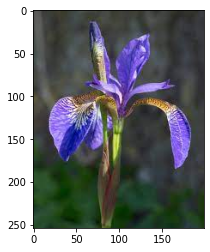

In [8]:
i2 = io.imread('iris.jpg')
plt.imshow(i2)
plt.show()

### a. Gunakan Sobel spatial filter dan Prewitt spatial filter untuk menemukan dan menampilkan horizontal edge dari citra tersebut

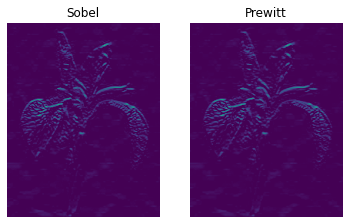

In [9]:
gray = color.rgb2gray(i2)
prewitt_h = util.img_as_ubyte(filters.prewitt_h(gray))
sobel_h = util.img_as_ubyte(filters.sobel_h(gray))

plt.subplot(1,2,1)
plt.imshow(sobel_h)
plt.title('Sobel'); plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(prewitt_h)
plt.title('Prewitt'); plt.axis("off")

plt.show()

### b. Gunakan Sobel spatial filter dan Prewitt spatial filter untuk menemukan dan menampilkan vertical edge dari citra tersebut

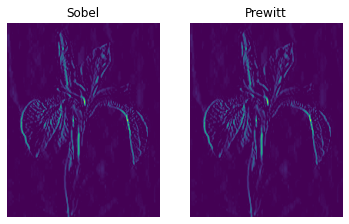

In [10]:
gray = color.rgb2gray(i2)
prewitt_v = util.img_as_ubyte(filters.prewitt_v(gray))
sobel_v = util.img_as_ubyte(filters.sobel_v(gray))

plt.subplot(1,2,1)
plt.imshow(sobel_v)
plt.title('Sobel'); plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(prewitt_v)
plt.title('Prewitt'); plt.axis("off")

plt.show()

### c. Berdasarkan hasil 2a. dan 2b. temukan dan tampilkan edge keseluruhan dari citra tersebut

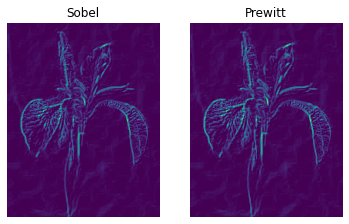

In [11]:
merge_prewitt = prewitt_v+prewitt_h
merge_sobel = sobel_v+sobel_h


plt.subplot(1,2,1)
plt.imshow(merge_sobel)
plt.title('Sobel'); plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(merge_prewitt)
plt.title('Prewitt'); plt.axis("off")

plt.show()

In [12]:
# def angle(dx, dy):
#     return np.mod(np.arctan2(dy, dx), np.pi)


# # true_angle = angle(image_x, image_y)
# angle_sobel = angle(filters.sobel_h(gray),
#                     filters.sobel_v(gray))
# angle_prewitt = angle(filters.prewitt_h(gray),
#                       filters.prewitt_v(gray))


# plt.subplot(1,2,1)
# plt.imshow(angle_sobel)
# plt.title('Sobel'); plt.axis("off")

# plt.subplot(1,2,2)
# plt.imshow(angle_prewitt)
# plt.title('Prewitt'); plt.axis("off")

# plt.show()

# Soal 3

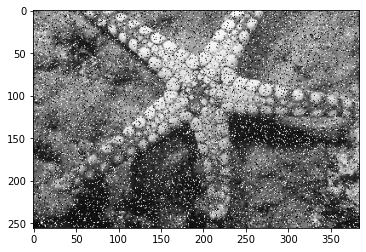

In [13]:
i3 = io.imread('starfish.png')
plt.imshow(i3,cmap='gray')
plt.show()

### a. Terapkan median filter pada citra tersebut dengan ukuran kernel 9x9

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


(-0.5, 383.5, 255.5, -0.5)

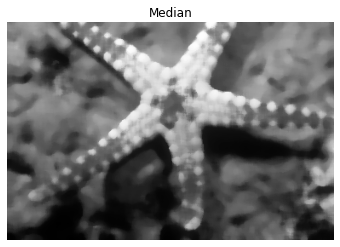

In [14]:
gray3 = color.rgb2gray(i3)
noise = util.img_as_ubyte(util.random_noise(gray3,mode='s&p', salt_vs_pepper=0.02))
fi = filters.rank.median(noise, selem=morphology.square(9))

plt.imshow(fi,cmap='gray')
plt.title('Median'); plt.axis("off")

### b. Terapkan mean filter pada citra tersebut dengan ukuran kernel 9x9

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


(-0.5, 383.5, 255.5, -0.5)

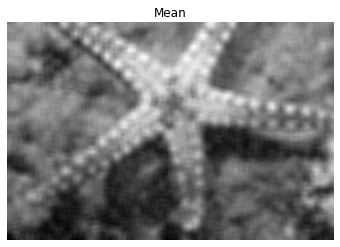

In [15]:
gray3b = color.rgb2gray(i3)
fi = filters.rank.mean(gray3b,selem=morphology.square(9))
plt.imshow(fi,cmap='gray')
plt.title('Mean'); plt.axis("off")

 ### c. Ceritakan perbedaan citra yang dihasilkan pada soal 3a. dan 3b. Filter manakah yang hasilnya lebih baik menurut Anda? Berikan pula alasannya.

Dari gambar diatas, terlihat bahwa median filter membuat gambar menjadi lebih jelas sedangkan mean filter membuat gambar menjaditidak jelas. Oleh karena itu, terlihat  bahwa median filter lebih baik dibandingkan mean filter. Hal itu disebabkan karena Median filter mengganti intensitas piksel pada pusat filter dengan median dari
intensitas neighborhood sehhingga efektif untuk menghilangkan noise pada gambar dan membuat hasil gambar menjadi lebih baik. Sedangkan Mean Filter mengganti intensitas tiap piksel dalam citra dengan rata-rata intensitas pada neighborhood sehingga jika terdapat banyak intensitas pada neighborhood yang kurang maka akan menghasil filter gambar yang kurang baik. 